In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import re
#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
# LOAD THE DATA
data_imdb = pd.read_csv('clean_data_imdb.csv')
data_bechdel = pd.read_csv('clean_data_bechdel.csv')
data_character = pd.read_csv('clean_data_character.csv')
data_original = pd.read_csv('clean_data_original.csv')
ethnicity_df = pd.read_csv('ethnicity_labels.csv')
data_success = pd.read_csv('clean_data_success.csv')

In [ ]:
# TITLE AND ABSTRACT 

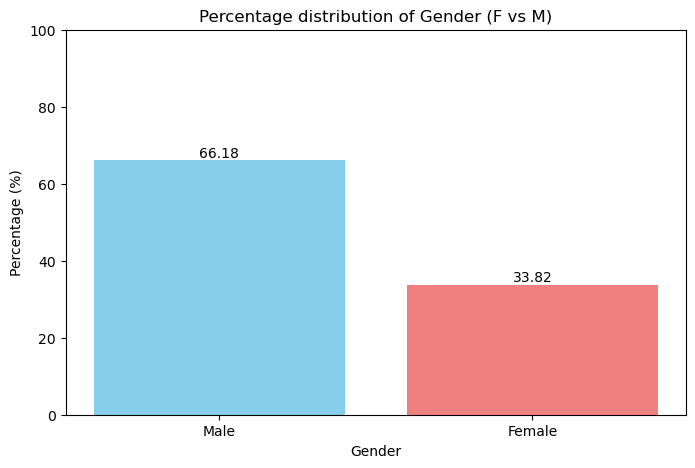

In [3]:
data_character_female = data_character[data_character["actor_gender"] == "F"]
data_character_male = data_character[data_character["actor_gender"] == "M"]
nbre_female = len(data_character_female)
nbre_male = len(data_character_male)
nbre_actors = nbre_male + nbre_female

gender_distrib= {
    'Gender': ['Male', 'Female'],
    'Percentage': [nbre_male*100/nbre_actors , nbre_female*100/nbre_actors]
}
df_gender_distrib = pd.DataFrame(gender_distrib)

# Assuming 'gender' is the column with 'F' and 'M' values
# Plot the distribution of gender
plt.figure(figsize=(8, 5))
bars = plt.bar(df_gender_distrib ['Gender'], df_gender_distrib ['Percentage'], color=['skyblue', 'lightcoral'])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-position
        height,                             # Y-position (top of the bar)
        f'{height:.2f}',                   # Text (percentage with 2 decimal places)
        ha='center',                        # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )

# Set plot labels and title
plt.title('Percentage distribution of Gender (F vs M)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0,100)
plt.xticks(rotation=0)
plt.show()

As expected, a significant difference is observed in the number of actors between men and women. Here, men represent 66.18% of the actors, while women account for 33.82%.  
Now, the question is: even if women have always been underrepresented in cinema since its inception, has their representation increased over the years?

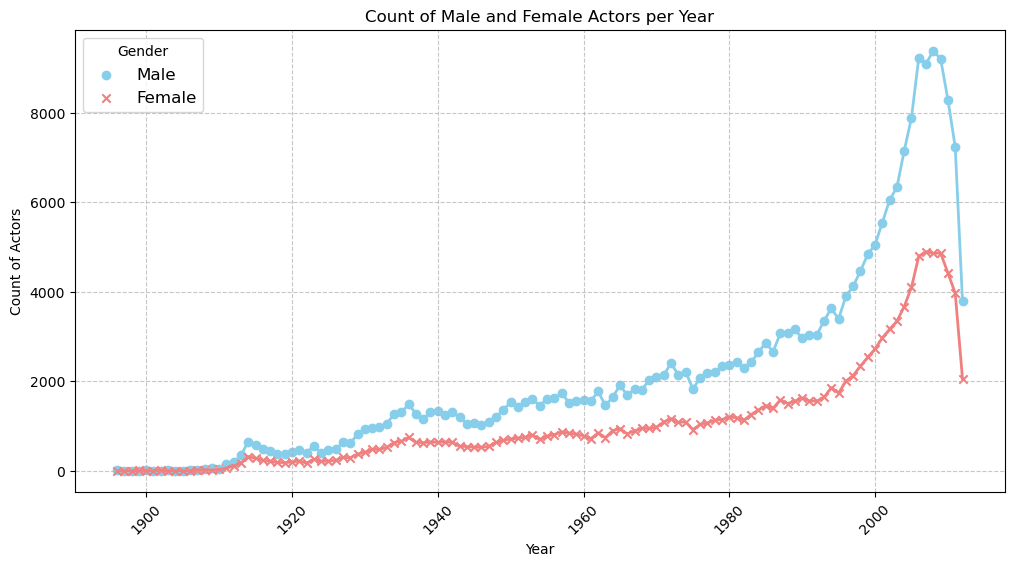

In [44]:
# Grouping data by release year and actor gender
gender_count_per_year = data_character.groupby(['release_year', 'actor_gender']).size().unstack(fill_value=0)

male_counts = gender_count_per_year['M']
female_counts = gender_count_per_year['F']
years = gender_count_per_year.index

# Create a figure with a larger size
plt.figure(figsize=(12, 6))

# Plotting the scatter plot with lines to show trends
plt.plot(years, male_counts, color='skyblue', markersize=8, linestyle='-', linewidth=2)
plt.plot(years, female_counts, color='lightcoral', markersize=8, linestyle='-', linewidth=2)

# Scatter plot with larger, more visible markers
plt.scatter(years, male_counts, color='skyblue', label='Male', marker='o')
plt.scatter(years, female_counts, color='lightcoral', label='Female', marker='x')

plt.title('Count of Male and Female Actors per Year')
plt.xlabel('Year')
plt.ylabel('Count of Actors')

plt.xticks(rotation=45)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend with a more visible position
plt.legend(title='Gender', fontsize=12, loc='upper left', frameon=True)


plt.show()

After plotting the number of actors and actresses per year, it appears that their numbers have generally increased over the years for both, but a decline is observed after 2011. This is quite unusual, considering that the cinema industry itself has remained steady.


Upon investigation, we found that the decrease in the number of actors and actresses after 2011 is due to a decline in the number of movies in our dataset during that period. As a result, the number of actors naturally decreases, as shown in the plot below.

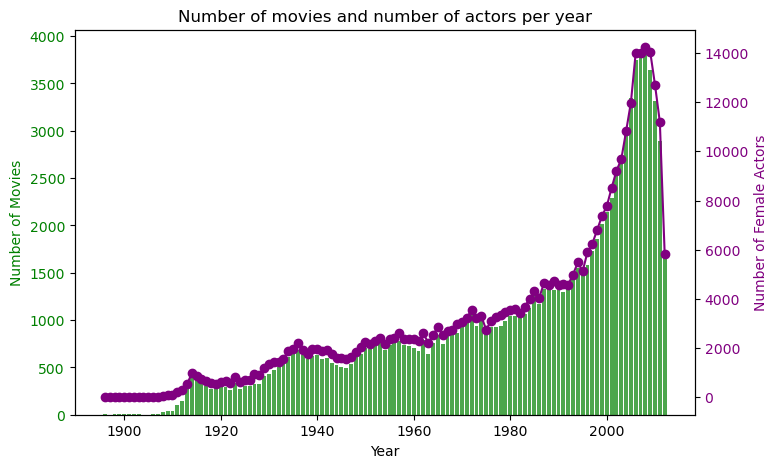

In [42]:
movies_per_year = data_character.groupby('release_year')['Wiki_ID'].nunique()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the number of movies per year
ax1.bar(years, movies_per_year, color='green', label='Number of Movies', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Plot female actors on a secondary axis
ax2 = ax1.twinx()
ax2.plot(years, female_counts + male_counts , color='purple', label='Number of Actors', marker='o')
ax2.set_ylabel('Number of Female Actors', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Add a title
plt.title('Number of movies and number of actors per year')

# Display the plot
plt.show()

Given that the number of films per year is not consistent, to study the evolution of the number of actors over the years, it would be necessary to divide the number of actors by the number of films each year. This would make the data comparable across years.

Now, the focus is to observe whether the ratio of women to men evolves over the years.

In [41]:
# Calculate the ratio of female actors to movies per year 
ratio_male_to_movie = male_counts / movies_per_year
ratio_female_to_movie = female_counts / movies_per_year

# Calculate the ratio female/male per year 
ratio_female_male = female_counts / male_counts
ratio_female_male[male_counts == 0] = 1

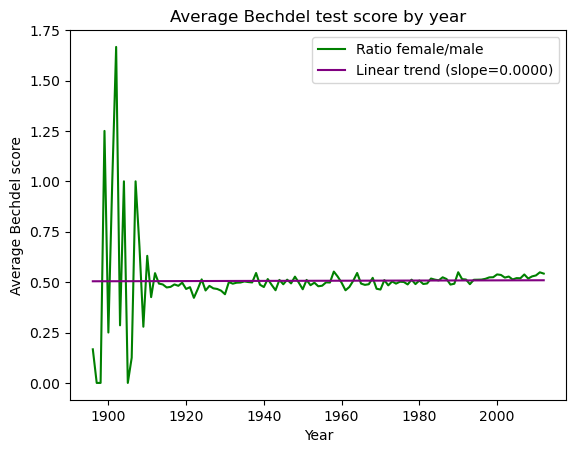

Pearson Correlation Coefficient: 0.0080, p-value: 0.9320845697302564, intercept=0.42


In [37]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(years,ratio_female_male)

sns.lineplot(x=years, y=ratio_female_male, label='Ratio female/male', color = 'green')
plt.plot(years, slope*years+intercept, color='purple',label=f'Linear trend (slope={slope:.4f})')

plt.legend()
plt.show()

plt.title('Average Bechdel test score by year')
plt.xlabel('Year')
plt.ylabel('Average Bechdel score');

print(f"Pearson Correlation Coefficient: {rvalue:.4f}, p-value: {pvalue}, intercept={intercept:.2f}")

Male Ratio - Pearson Correlation Coefficient: 0.8253, p-value: 2.5876780052741712e-30, intercept=-20.02
Female Ratio - Pearson Correlation Coefficient: 0.7381, p-value: 2.203536060677413e-21, intercept=-11.31


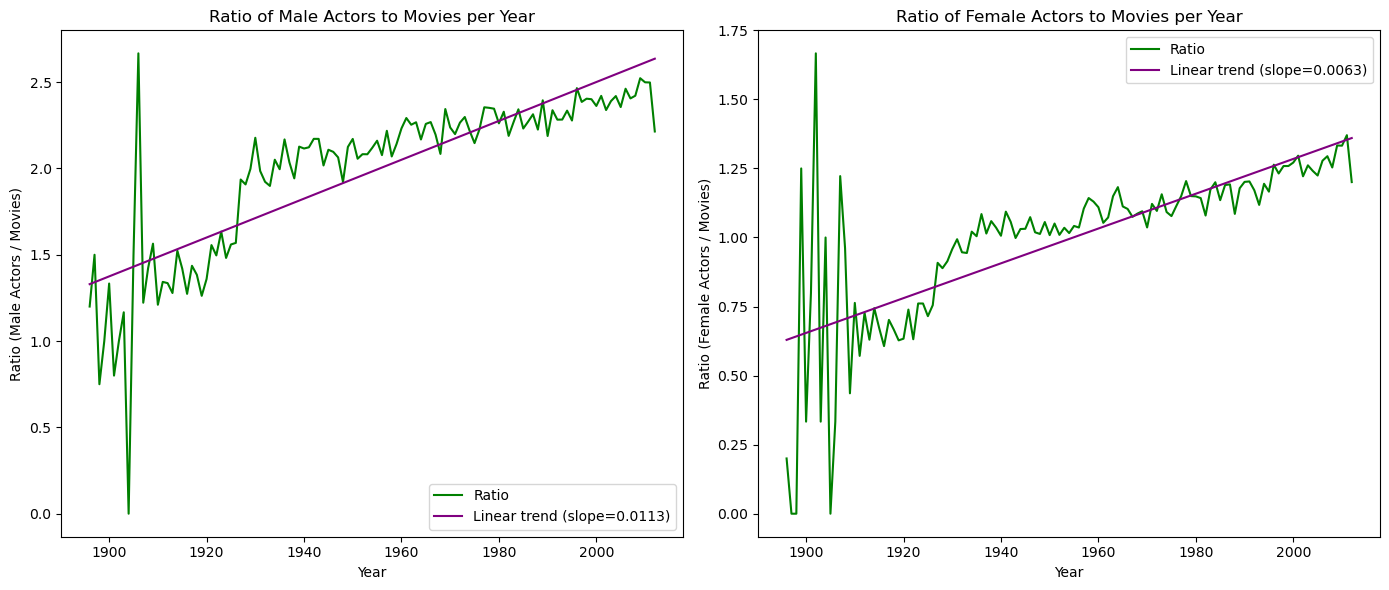

In [39]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Male to movie ratio
slope_male, intercept_male, rvalue_male, pvalue_male, stderr_male = stats.linregress(years, ratio_male_to_movie)

sns.lineplot(x=years, y=ratio_male_to_movie, label='Ratio', color= 'green', ax=axes[0])
axes[0].plot(years, slope_male * years + intercept_male, color='purple', label=f'Linear trend (slope={slope_male:.4f})')
axes[0].legend()

axes[0].set_title('Ratio of Male Actors to Movies per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Ratio (Male Actors / Movies)')

# Print statistics for Male to movie ratio
print(f"Male Ratio - Pearson Correlation Coefficient: {rvalue_male:.4f}, p-value: {pvalue_male}, intercept={intercept_male:.2f}")

# Female to movie ratio
slope_female, intercept_female, rvalue_female, pvalue_female, stderr_female = stats.linregress(years, ratio_female_to_movie)

sns.lineplot(x=years, y=ratio_female_to_movie, label='Ratio',color = 'green', ax=axes[1])
axes[1].plot(years, slope_female * years + intercept_female, color='purple', label=f'Linear trend (slope={slope_female:.4f})')
axes[1].legend()

axes[1].set_title('Ratio of Female Actors to Movies per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Ratio (Female Actors / Movies)')

# Print statistics for Female to movie ratio
print(f"Female Ratio - Pearson Correlation Coefficient: {rvalue_female:.4f}, p-value: {pvalue_female}, intercept={intercept_female:.2f}")

# Display the plots
plt.tight_layout()
plt.show()

Analysis of the female-to-male ratio in movies over the years reveals that, while the ratio of women to men has remained largely unchanged over the decades, the absolute number of women in films has steadily increased. The linear regression of the ratio over time shows a slope of 0, indicating that the relative representation of women in films has not significantly shifted. However, a closer examination of the raw data reveals a consistent increase in the number of women appearing in movies each year. This suggests that while women's representation in relation to men remains stable, the overall participation of women in the film industry has grown over time.

## Creation of the success metrics 

To determine success metrics for the analysis, IMDb ratings (`Rating`) and box office revenue (`BoxOfficeRevenue`) are utilized. These metrics provide complementary perspectives: IMDb ratings reflect audience and critical reception, offering qualitative insights, while box office revenue quantifies financial performance, delivering measurable data. Together, they form a comprehensive framework for evaluating a movie's overall success and impact.

However, box office revenue only accounts for total earnings and does not consider the production budget, which can lead to biased evaluations. For example, a low-budget film generating three times its cost could be highly profitable but appear less successful in absolute revenue terms compared to a high-budget blockbuster.

To address this, **net box office revenue** ('Net_revenue') is introduced, defined as:  
**Net Box Office Revenue = Box Office Revenue - Initial Budget.**

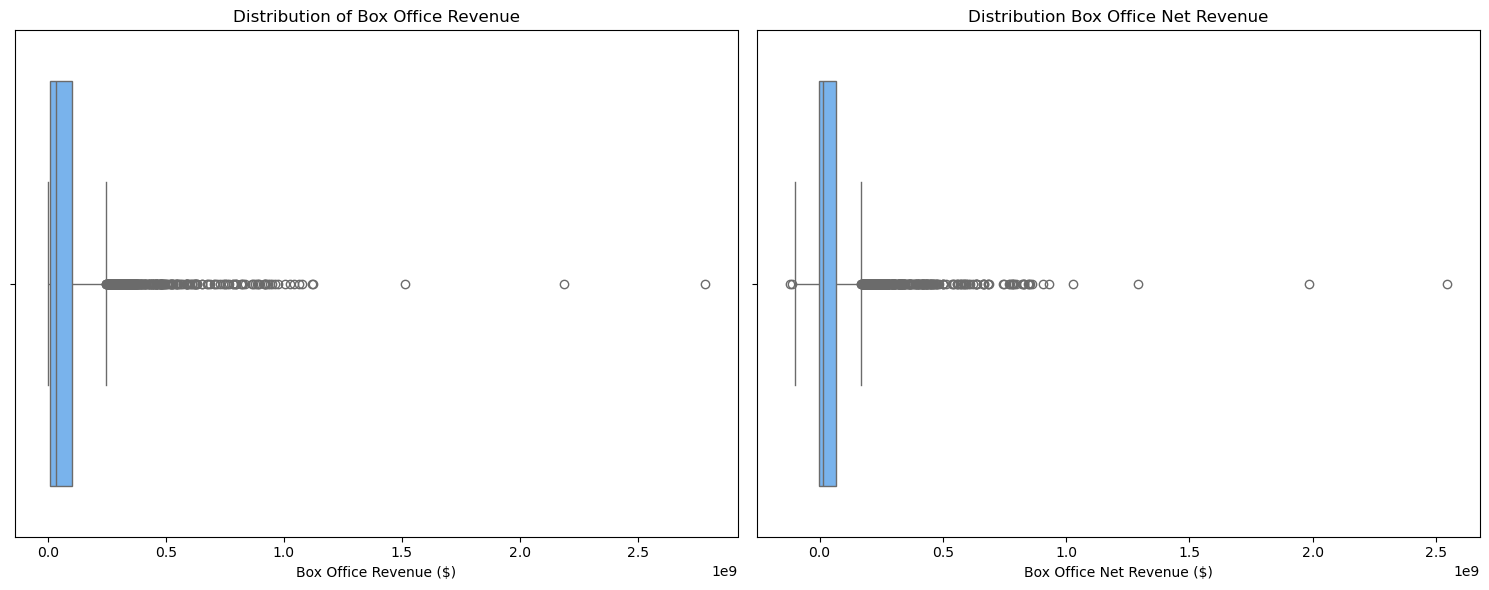

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot for Box Office Revenue
sns.boxplot(data=data_success, x='BoxOfficeRevenue', color='#66b3ff', ax=axes[0])
axes[0].set_title("Distribution of Box Office Revenue")
axes[0].set_xlabel("Box Office Revenue ($)")

# Second subplot for Net Box Office Revenue
sns.boxplot(data=data_success, x='Net_revenue', color='#66b3ff', ax=axes[1])
axes[1].set_title("Distribution Box Office Net Revenue")
axes[1].set_xlabel("Box Office Net Revenue ($)")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

This adjustment provides a more balanced distribution of financial performance within the metrics, offering a clearer representation of profitability and a fairer comparison across films.

To analyze the success metrics, both IMDb ratings (`Rating`) and net box office revenue were plotted to visually inspect their distributions. This allows for the assessment of whether these metrics require standardization, as the scale and range of the data could impact subsequent analyses. 

By plotting the metrics, a different distribution and scale were observed, indicating that standardization will be required when computing the success metrics.

Using rank normalization to combine box-office net revenue and IMDb ratings ensures a fair and balanced comparison between these two metrics, despite their differences in scale and distribution. By converting raw values into ranks, this approach eliminates the influence of large numerical disparities and focuses on the relative performance within each dataset. This is particularly important when integrating metrics like revenue, which is skewed by a few blockbusters, and ratings, which tend to be more evenly distributed. The result is a unified metric that captures both financial success and audience approval without bias, enabling a comprehensive and equitable evaluation.

In [9]:
data_success['BoxOfficeRank'] = data_success['Net_revenue'].rank(pct=True)
data_success['RatingRank'] = data_success['rating'].rank(pct=True)

To determine the appropriate weight for each metric when combining them, we can plot one against the other (e.g., box-office revenue vs. IMDb rating) to assess their correlation. If the correlation is weak or non-existent, it indicates that the two metrics measure different and independent aspects of success. In such a case, it would be reasonable to assign equal weights (50/50) to each metric, ensuring that neither dominates the combined metric. This approach ensures a balanced representation of both financial performance and audience approval in the final evaluation.

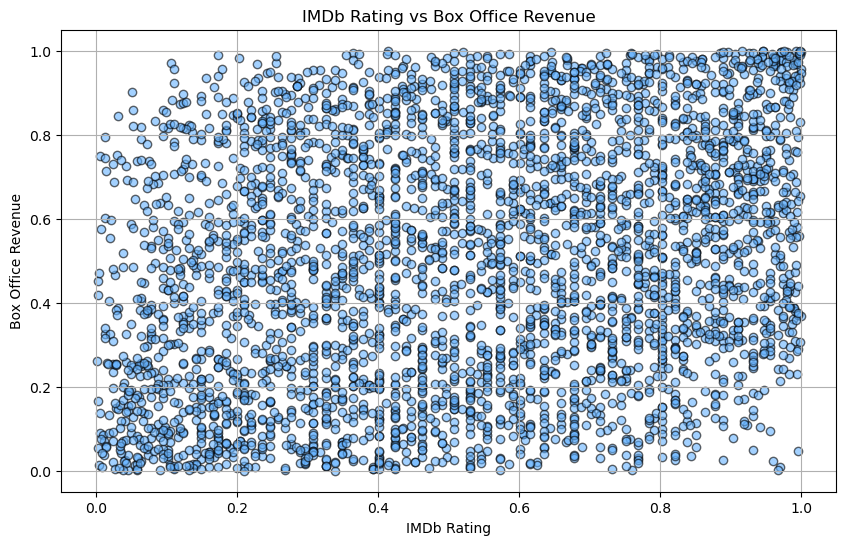

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data_success['RatingRank'],data_success['BoxOfficeRank'],  alpha=0.6, color='#66b3ff', edgecolor='black')
plt.title("IMDb Rating vs Box Office Revenue")
plt.ylabel("Box Office Revenue")
plt.xlabel("IMDb Rating")
plt.grid(True)
plt.show()

In [10]:
correlation = data_success['BoxOfficeRank'].corr(data_success['RatingRank'])
correlation2 = data_success['RatingRank'].corr(data_success['BoxOfficeRank'])

print(f"Correlation between Box Office and IMDb Rating: {correlation}")

Correlation between Box Office and IMDb Rating: 0.27268199436548246


No significant correlation, we can assign equal weight to both metrics.

In [14]:
weight_box_office = 0.5
weight_imdb = 0.5
data_success['SuccessMetric'] = (weight_box_office * data_success['BoxOfficeRank']) + (weight_imdb * data_success['RatingRank'])

Correlation between ratio female/male and successmetrics 

In [60]:
data_success['num_actors'] = data_success['Movie_ID'].map(
                                                    data_character.groupby('Movie_ID')['Actor_ID'].nunique()
                                                    )

data_success['num_women'] = data_success['Movie_ID'].map(
                                                    data_character[data_character['actor_gender']=='F'].groupby('Movie_ID')['Actor_ID'].nunique()
                                                )

data_success = data_success.dropna(subset=['num_actors', 'num_women', 'SuccessMetric'])

data_success['ratio_W/M'] = np.where(data_success['num_actors'] == 0, 1, data_success['num_women'] / data_success['num_actors'])

#correlation3 = data_success['SuccessMetric'].corr(data_success['ratio_W/M'])
# Drop rows with NaN values in relevant columns

# Compute correlation between SuccessMetric and the ratio of women to men
correlation3 = data_success['SuccessMetric'].corr(data_success['ratio_W/M'])


In [61]:
correlation3

-0.06281659095098419

In [55]:
correlation3

-0.06281659095098419

In [ ]:
data_corr_genre = datasuccess.copy()



analysis = pd.merge(
                        women_data[['actor_age_movie_released', 'Movie_ID', 'actor_name', 'ethnic_cat', 'actor_height']],
                        data_imdb_women.dropna(subset=['SuccessMetric'])[['title', 'SuccessMetric', 'Movie_ID', 'ratio_W/M', 'Rating']],
                        on='Movie_ID',
                        how = 'inner'
                        )

mean_women_data = analysis.groupby('Movie_ID').agg(
                                                    mean_age=('actor_age_movie_released', 'mean'),
                                                    num_women=('actor_age_movie_released', 'size'),
                                                    title=('title', 'first'),
                                                    SuccessMetric=('SuccessMetric', 'first'),
                                                    ratio_W_M = ('ratio_W/M', 'first'),
                                                    ethnicities = ('ethnic_cat', lambda x: [eth for eth in x if pd.notna(eth)]),
                                                    avg_height = ('actor_height', 'mean'),
                                                    Rating = ('Rating', 'first')
                                                ).reset_index()